In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter(action='ignore')
sns.set_theme(style="darkgrid",palette=sns.color_palette("muted"))

In [ ]:
!unzip ../content/archive.zip  #unzip the dataset

Archive:  ../content/archive.zip
  inflating: Titanic-Dataset.csv     


In [ ]:
data = pd.read_csv("/content/Titanic-Dataset.csv")
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.duplicated().sum()

data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data = data.drop(columns=["PassengerId","Name","Cabin","Ticket"])


In [ ]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [ ]:
# now removing the NaN values
data[data["SibSp"]==8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,male,NaN,8,2,69.55,S
180,0,3,female,NaN,8,2,69.55,S
201,0,3,male,NaN,8,2,69.55,S
324,0,3,male,NaN,8,2,69.55,S
792,0,3,female,NaN,8,2,69.55,S
846,0,3,male,NaN,8,2,69.55,S
863,0,3,female,NaN,8,2,69.55,S


In [ ]:
data = data.drop(data[data["SibSp"]==8].index)


In [ ]:
data.groupby(["Survived","Pclass","SibSp"])["Age"].mean()

Survived  Pclass  SibSp
0         1       0        46.375000
                  1        38.500000
                  2        44.000000
                  3        19.000000
          2       0        33.833333
                  1        34.239130
                  2        25.000000
          3       0        29.103175
                  1        27.966667
                  2        24.444444
                  3         5.428571
                  4         6.800000
                  5        10.200000
1         1       0        34.594203
                  1        36.998298
                  2        35.500000
                  3        23.500000
          2       0        29.333261
                  1        22.421875
                  2        13.250000
                  3        30.000000
          3       0        22.990333
                  1        17.277778
                  2         2.166667
                  3        33.000000
                  4         8.333333
Name: Age, dty

In [ ]:
data['Age'] = data['Age'].fillna(data.groupby(["Survived","Pclass","SibSp"])["Age"].transform('mean'))

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
data[data.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [ ]:
data=data.dropna().reset_index(drop=True)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.385488,2.306122,29.525662,0.464853,0.369615,31.799432
std,0.486986,0.835742,13.509299,0.883324,0.796919,49.781845
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.103175,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
data = data[(np.abs(stats.zscore(data[['Age','Fare']])) < 3).all(axis=1)]

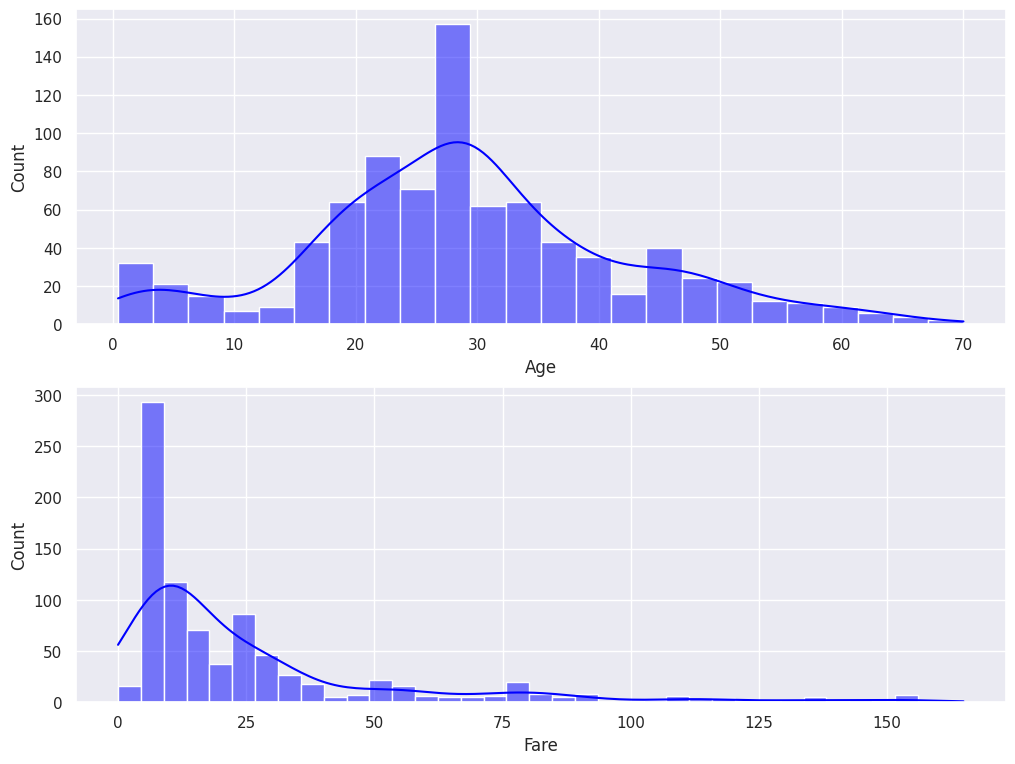

In [ ]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['Age','Fare']):
    plt.subplot(2,1,i+1)
    sns.histplot(data=data,x=col,kde=True,color="blue")

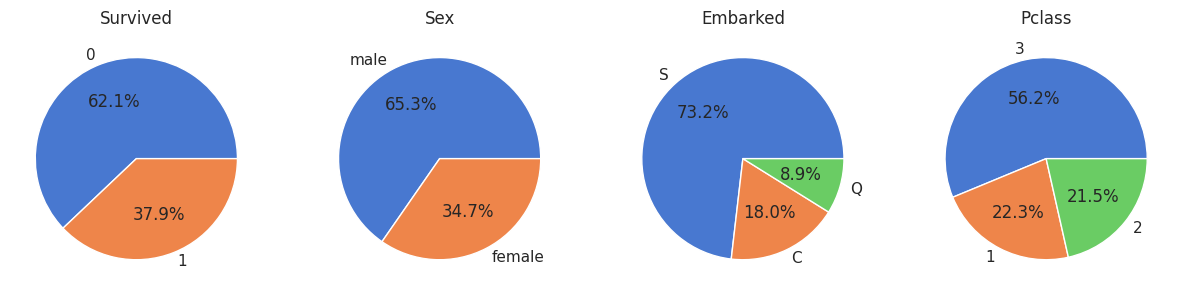

In [ ]:
plt.figure(figsize=(15,12))
for i,col in enumerate(['Survived','Sex','Embarked','Pclass']):
    plt.subplot(1,4,i+1)
    x=data[col].value_counts().reset_index()
    plt.title(f"{col}")
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%")

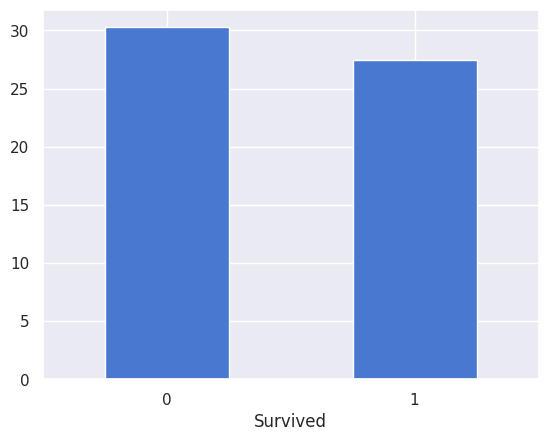

In [ ]:
data.groupby("Survived")["Age"].mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

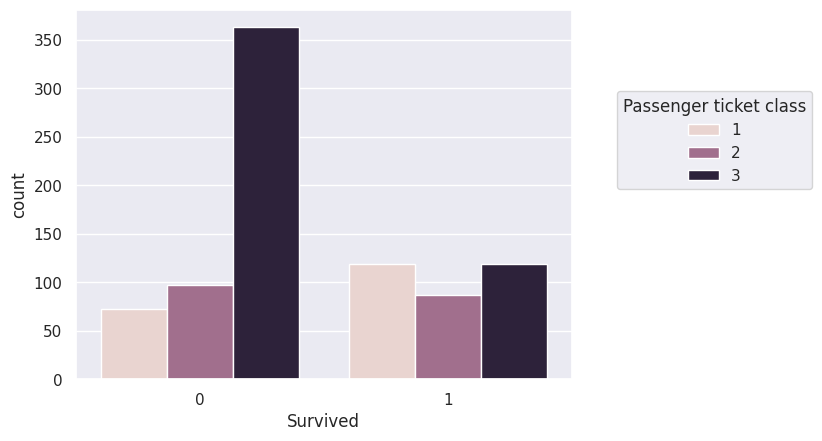

In [ ]:
sns.countplot(data=data,x="Survived",hue="Pclass")
plt.legend(bbox_to_anchor=(1.5,0.8),title="Passenger ticket class")
plt.show()

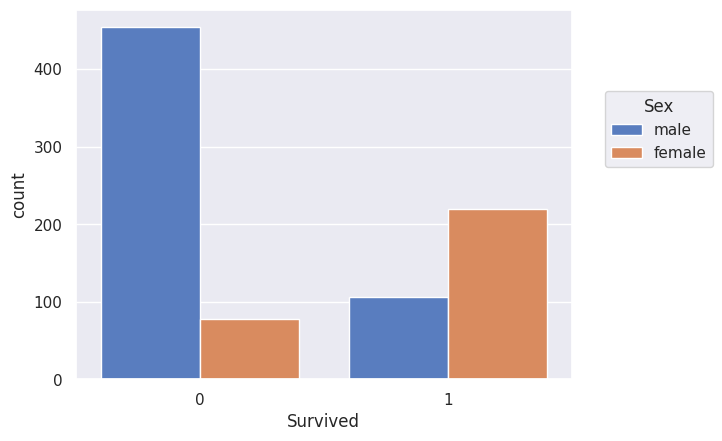

In [ ]:
sns.countplot(data=data,x="Survived",hue="Sex")
plt.legend(bbox_to_anchor=(1.3,0.8),title="Sex")
plt.show()

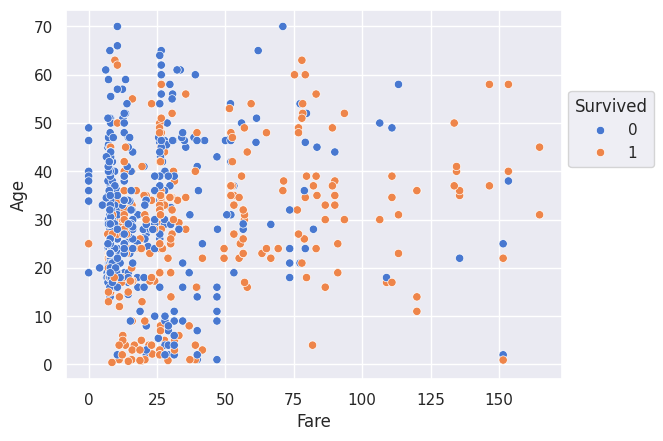

In [ ]:
sns.scatterplot(data=data,x="Fare",y="Age",hue="Survived")
plt.legend(bbox_to_anchor=(1.2,0.8),title="Survived")
plt.show()